        Date   Door TO Door  GARDEN/Biomass  PRIVATE Vehicle    TOTAL  \
0  01-02-2021       552.300          55.200            6.600  614.100   
1  02-02-2021       543.375          52.270           13.055  608.700   
2  03-02-2021       526.965          53.205           10.780  590.950   
3  04-02-2021       532.745          53.550           16.580  602.875   
4  05-02-2021       534.260          58.375            7.675  600.310   

   DEBRIS C&D Waste         Day  
0             29.245     Monday  
1             28.920    Tuesday  
2             31.100  Wednesday  
3             34.815   Thursday  
4             28.845     Friday  
    Collection Date  Door TO Door  GARDEN/Biomass  PRIVATE Vehicle    TOTAL  \
176      2021-07-27       568.220          52.290           34.990  655.500   
177      2021-07-28       558.925          57.845           12.150  628.920   
178      2021-07-29       567.030          54.960           26.930  648.920   
179      2021-07-30       539.635        

<AxesSubplot:xlabel='Day', ylabel='DEBRIS C&D Waste'>

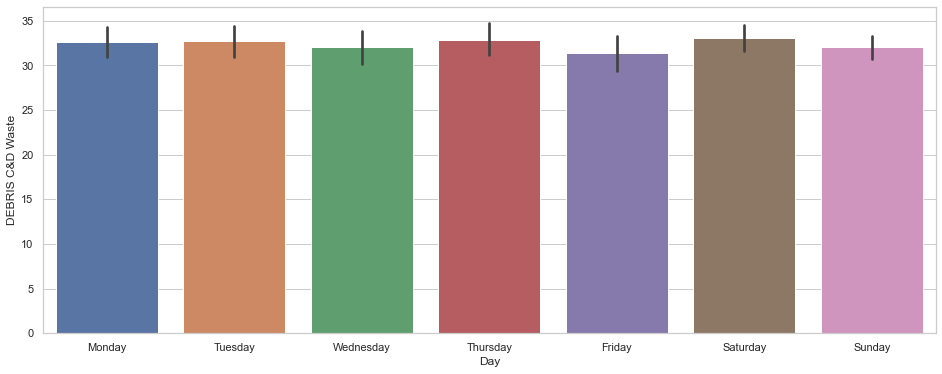

In [1]:
import pandas as pd
from pandas import Series as s
import seaborn as sns
from matplotlib import pyplot as plt

dailycollection = pd.read_csv("Data/MSWMonthWiseCollectioncsv.csv")
#df = pd.read_csv(file, parse_dates=['T'], index_col=['T'])

print(dailycollection.head())

#Rename column names with extra spaces
dailycollection.rename(columns = {"Date ":"Collection Date", "DEBRIS C&D Waste ":"DEBRIS C&D Waste"}, inplace = True)

#Converting to format of Date required by Series 'YYYY-mm-dd'
dailycollection["Collection Date"] =   pd.to_datetime(dailycollection["Collection Date"], format='%d-%m-%Y').dt.strftime('%Y-%m-%d')

#Adding new column Day_Index for computations
dailycollection['Day_Index'] = pd.to_datetime(dailycollection['Collection Date']).dt.dayofweek


print(dailycollection.tail())

sns.set_theme(style="whitegrid")

plt.figure(figsize=(16, 6))

sns.barplot(x="Day", y = "DEBRIS C&D Waste", data = dailycollection )




<AxesSubplot:xlabel='Day', ylabel='DEBRIS C&D Waste'>

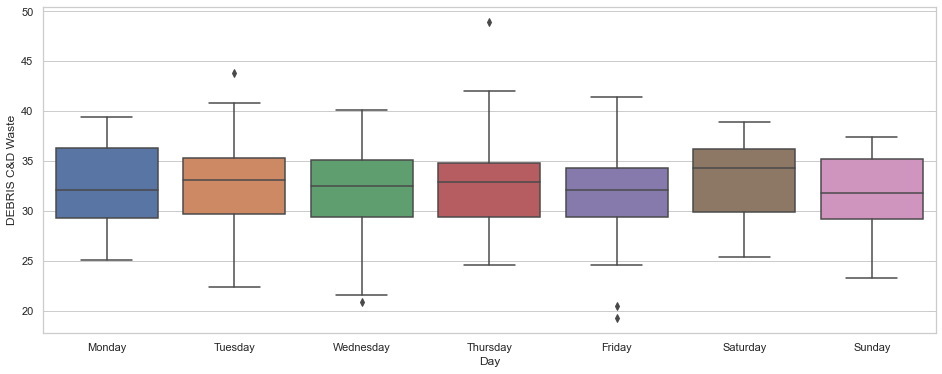

In [2]:
plt.figure(figsize=(16, 6))

sns.boxplot(x = dailycollection['Day'], y =  dailycollection['DEBRIS C&D Waste'])

<AxesSubplot:xlabel='Collection Date', ylabel='DEBRIS C&D Waste'>

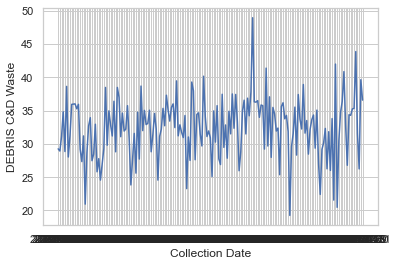

In [3]:
sns.lineplot(data=dailycollection, x="Collection Date", y="DEBRIS C&D Waste")


In [4]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(dailycollection["DEBRIS C&D Waste"])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
diff_dailycollection = dailycollection["DEBRIS C&D Waste"].diff()
#AFTER DIFFERENCING

data_Xsform = dailycollection['DEBRIS C&D Waste'].diff().dropna()
result =  adfuller((data_Xsform))

print("After")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.600325
p-value: 0.000000
Critical Values:
	1%: -3.467
	5%: -2.878
	10%: -2.575
After
ADF Statistic: -8.958359
p-value: 0.000000
Critical Values:
	1%: -3.469
	5%: -2.878
	10%: -2.576


# Time Series Data Analysis of Garbage Collection Data

In [5]:
dailycollection_idx = dailycollection[:]

print(min(dailycollection_idx["Collection Date"]))
print(max(dailycollection_idx['Collection Date']))

#Sorting by date
dailycollection_idx = dailycollection_idx.sort_values('Collection Date')
dailycollection_idx['Collection Date'] = pd.to_datetime(dailycollection_idx['Collection Date'])



2021-02-01
2021-07-31


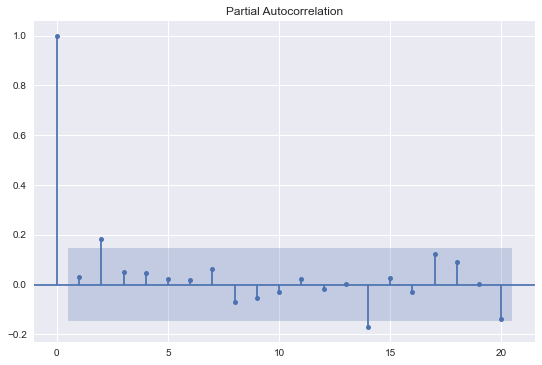

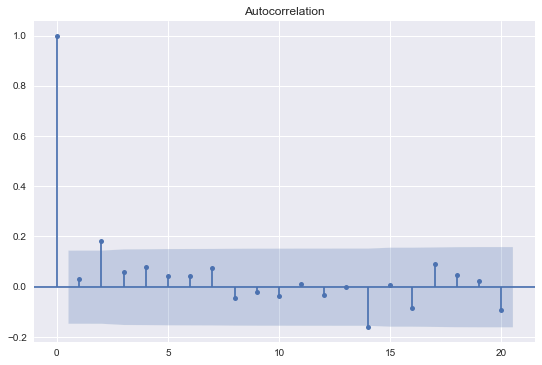

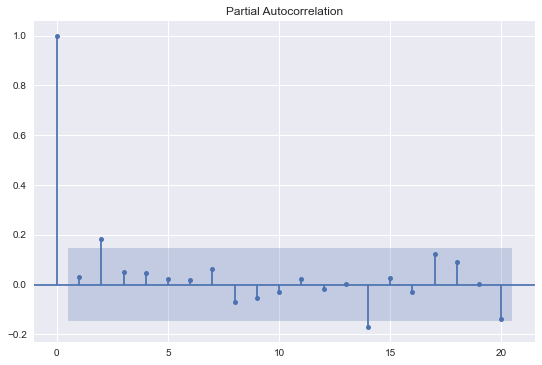

In [38]:
# # Creating Autocorrelation plot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf


# autocorrelation_plot(dailycollection_idx['DEBRIS C&D Waste'])

# plt.show()
plot_acf(dailycollection_idx['DEBRIS C&D Waste'], lags= 20)
plot_pacf(dailycollection_idx['DEBRIS C&D Waste'], lags = 20)

In [7]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

Collection Date
2021-02-01    29.245
2021-02-02    28.920
2021-02-03    31.100
2021-02-04    34.815
2021-02-05    28.845
               ...  
2021-07-27    43.865
2021-07-28    31.560
2021-07-29    26.230
2021-07-30    39.635
2021-07-31    36.570
Freq: D, Name: DEBRIS C&D Waste, Length: 181, dtype: float64


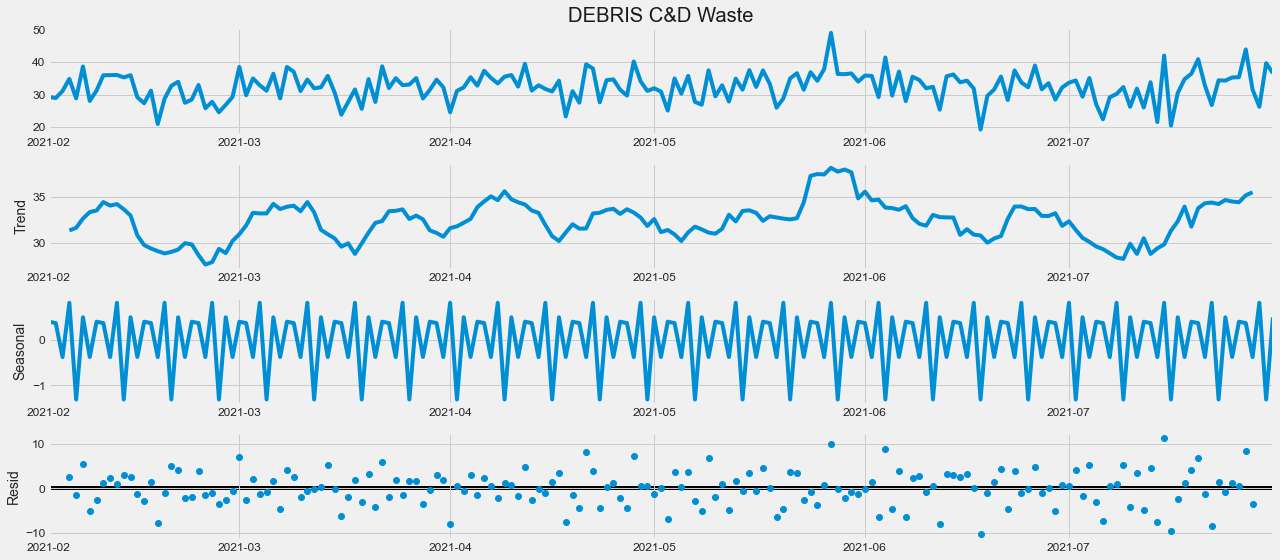

In [8]:

#Resample using the average of daily garbage collection. However in this case the daily average would be same because it is one record .
daily_resampled = dailycollection_idx.reset_index().set_index("Collection Date").resample('D')['DEBRIS C&D Waste'].sum()
print(daily_resampled)

#Seasonality Patterns
rcParams['figure.figsize'] = [18,8]

# Seasonal Decomposition by Moving Averages
decomposition = sm.tsa.seasonal_decompose(daily_resampled, model='additive')
fig = decomposition.plot()
plt.show()

In [28]:
#p = Seasonality , d = Trend and q = Noise
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 7)
SARIMAX: (0, 0, 1) x (0, 0, 2, 7)
SARIMAX: (0, 0, 2) x (0, 1, 0, 7)
SARIMAX: (0, 0, 2) x (0, 1, 1, 7)


In [27]:
aic_result = []
param_min_aci = {}
for param in pdq:
    count = 0
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(daily_resampled,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            aic_result.append(results.aic)
            param_min_aci.update({results.aic:(param, param_seasonal)})
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except RuntimeError:
            print("Error")
            continue
print("AIC: {} Param: {}", min(aic_result), param_min_aci[min(aic_result)])


ARIMA(0, 0, 0)x(0, 0, 0, 7) - AIC:1768.6909122489635
ARIMA(0, 0, 0)x(0, 0, 1, 7) - AIC:1522.0283682821555
ARIMA(0, 0, 0)x(0, 1, 0, 7) - AIC:1118.6755445453157
ARIMA(0, 0, 0)x(0, 1, 1, 7) - AIC:1000.9068548454213
ARIMA(0, 0, 0)x(1, 0, 0, 7) - AIC:1125.5201668306156
ARIMA(0, 0, 0)x(1, 0, 1, 7) - AIC:1044.2543873255281
ARIMA(0, 0, 0)x(1, 1, 0, 7) - AIC:1059.677797178406
ARIMA(0, 0, 0)x(1, 1, 1, 7) - AIC:1002.9021266939999
ARIMA(0, 0, 1)x(0, 0, 0, 7) - AIC:1579.4259371634664
ARIMA(0, 0, 1)x(0, 0, 1, 7) - AIC:1401.8334811047298
ARIMA(0, 0, 1)x(0, 1, 0, 7) - AIC:1113.6989385616412
ARIMA(0, 0, 1)x(0, 1, 1, 7) - AIC:997.7381009095662
ARIMA(0, 0, 1)x(1, 0, 0, 7) - AIC:1127.2124549236728
ARIMA(0, 0, 1)x(1, 0, 1, 7) - AIC:1040.6881096026623
ARIMA(0, 0, 1)x(1, 1, 0, 7) - AIC:1061.598385371241
ARIMA(0, 0, 1)x(1, 1, 1, 7) - AIC:999.7246123141871
ARIMA(0, 1, 0)x(0, 0, 0, 7) - AIC:1168.8317959482738
ARIMA(0, 1, 0)x(0, 0, 1, 7) - AIC:1123.2368625406095
ARIMA(0, 1, 0)x(0, 1, 0, 7) - AIC:1224.56376620750

    Collection Date  Door TO Door  GARDEN/Biomass  PRIVATE Vehicle    TOTAL  \
0        2021-02-01       552.300          55.200            6.600  614.100   
1        2021-02-02       543.375          52.270           13.055  608.700   
2        2021-02-03       526.965          53.205           10.780  590.950   
3        2021-02-04       532.745          53.550           16.580  602.875   
4        2021-02-05       534.260          58.375            7.675  600.310   
..              ...           ...             ...              ...      ...   
176      2021-07-27       568.220          52.290           34.990  655.500   
177      2021-07-28       558.925          57.845           12.150  628.920   
178      2021-07-29       567.030          54.960           26.930  648.920   
179      2021-07-30       539.635          56.635           18.410  614.680   
180      2021-07-31       560.670          56.020           12.985  629.675   

     DEBRIS C&D Waste        Day  Day_Index  
0    

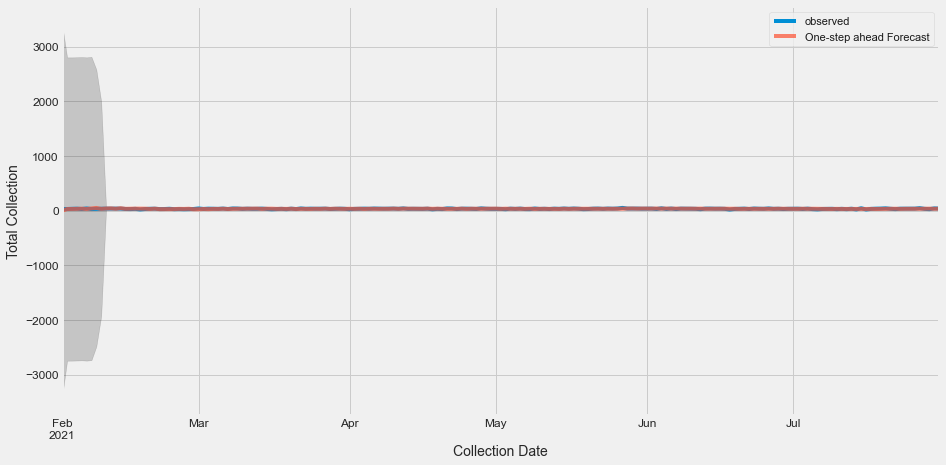

In [11]:
print(dailycollection)

pred = results.get_prediction(start=pd.to_datetime(dailycollection['Collection Date'][0]), dynamic=False)
print(pred.summary_frame())
pred_ci = pred.conf_int()
print(pred_ci)

ax = daily_resampled['2021':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Collection Date')
ax.set_ylabel('Total Collection')
plt.legend()

plt.show()

In [12]:
y_forecasted_cd = pred.predicted_mean
y_truth = daily_resampled[dailycollection['Collection Date'][0]:]

mse_debris = ((y_forecasted_cd - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse_debris, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse_debris), 2)))
mse_debris = round(y_forecasted_cd, 2)
mse_debris, y_forecasted_cd
cd = {"mse":mse_debris, "forecast": y_forecasted_cd}
%store cd

The Mean Squared Error of our forecasts is 31.06
The Root Mean Squared Error of our forecasts is 5.57
Stored 'cd' (dict)


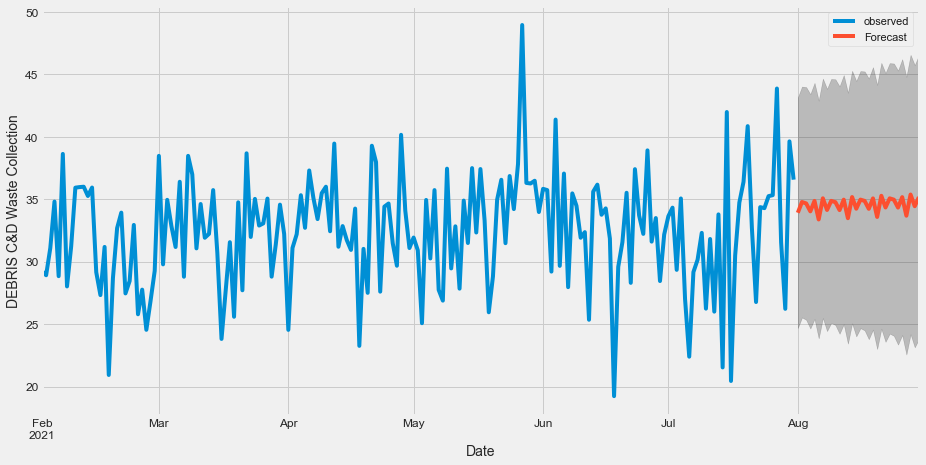

In [13]:
pred_uc = results.get_forecast(steps=30)
pred_ci = pred_uc.conf_int()

ax = daily_resampled.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('DEBRIS C&D Waste Collection')

plt.legend()
plt.show()

                                     SARIMAX Results                                     
Dep. Variable:                  DEBRIS C&D Waste   No. Observations:                  181
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 7)   Log Likelihood                -492.678
Date:                           Tue, 30 Nov 2021   AIC                            993.357
Time:                                   10:22:38   BIC                           1005.756
Sample:                               02-01-2021   HQIC                           998.391
                                    - 07-31-2021                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0768      0.086     -0.890      0.373      -0.246       0.092
ma.L1         -0.8681      0.050    -17.323

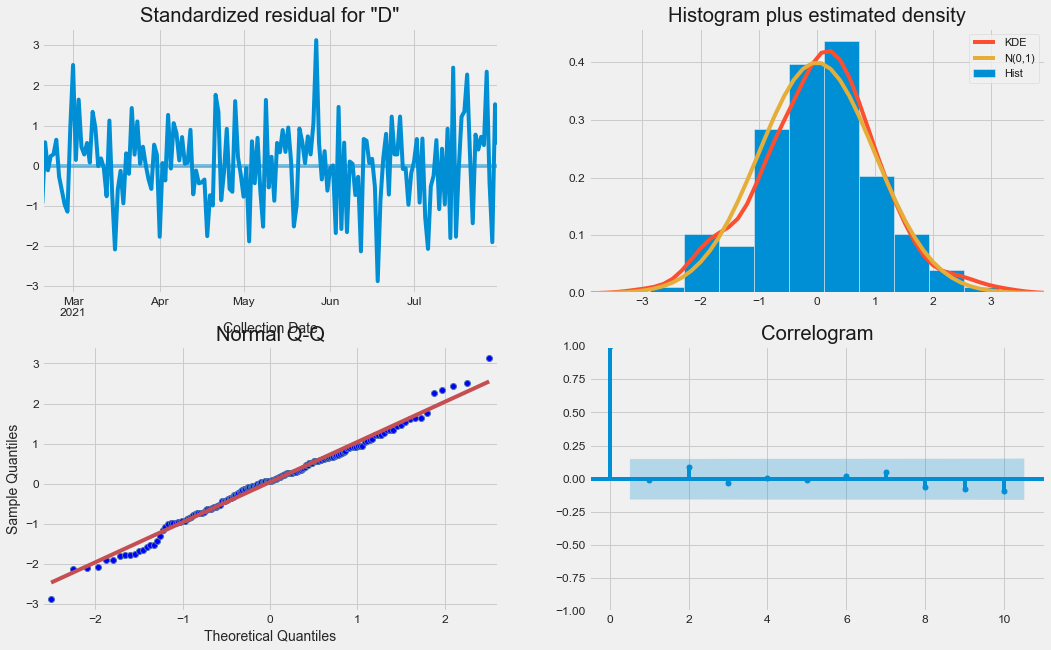

In [14]:
#ARIMA(1, 1, 1)x(0, 1, 1, 7) - AIC:993.3569657307372
#Fit the model for the least value for optimal option
mod = sm.tsa.statespace.SARIMAX(daily_resampled,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())
results.plot_diagnostics(figsize=(16, 10))
plt.show()

# Diagnostics Ljung Test
Null Hypothesis - Residuals are white noise that is independent and identically distributed
Alternate Hypothesis - Residuals are non stationary and have significant correlation in the subsequent lags
That is to validate the autocorrelation will decay to zero or not.

      lb_stat  lb_pvalue
1    0.139679   0.708600
2    1.369716   0.504162
3    2.081981   0.555567
4    2.321191   0.676914
5    2.790353   0.732268
6    2.873609   0.824535
7    3.178407   0.868022
8    3.179171   0.922615
9    3.203885   0.955660
10   3.353474   0.971841
11   3.414095   0.984045
12   4.932219   0.960205
13   5.052434   0.974021
14  11.447520   0.650577
15  11.790042   0.694847
16  16.832769   0.396498
17  17.632123   0.412396
18  18.284446   0.437067
19  18.375361   0.497510
20  19.770575   0.472361


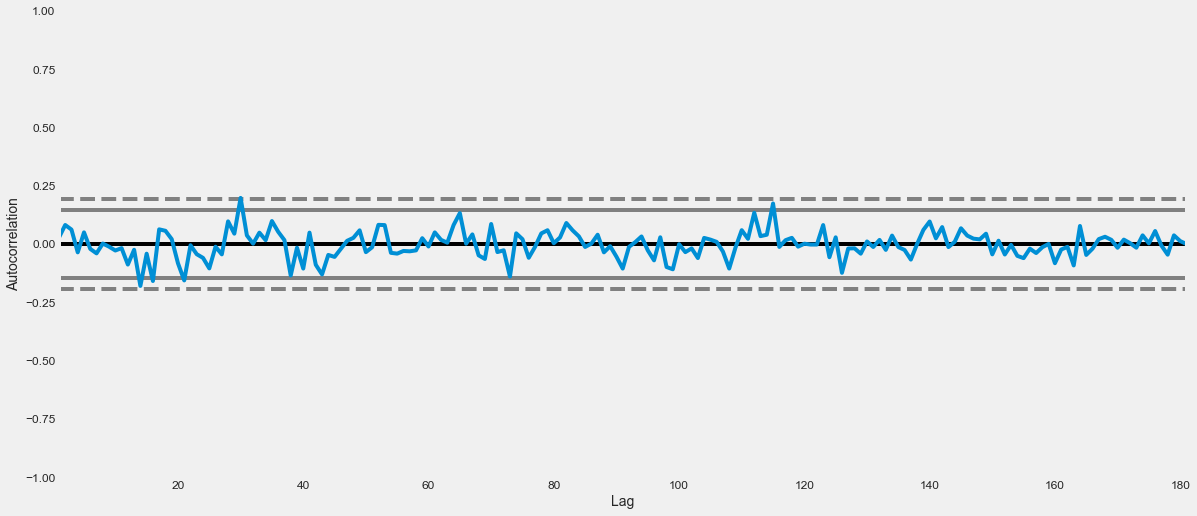

<AxesSubplot:ylabel='lb_stat'>

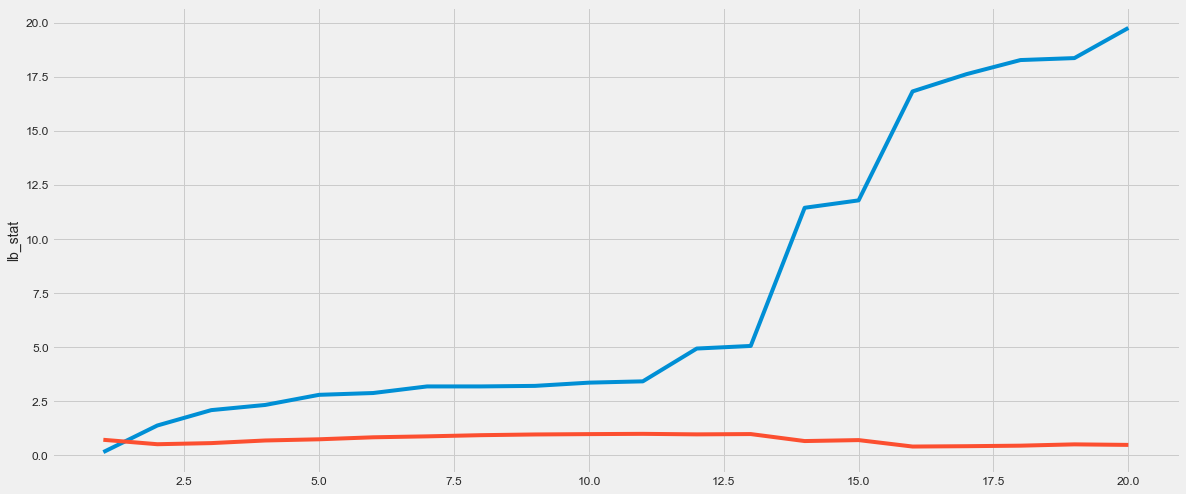

In [15]:
residual = results.resid
diagnostics = sm.stats.acorr_ljungbox(residual, lags=20, return_df= True)
print(diagnostics)
autocorrelation_plot(residual)
plt.show()
sns.lineplot(data = diagnostics["lb_stat"] )
sns.lineplot(data = diagnostics["lb_pvalue"] )


# Validating the one month forecast by splitting to 5:1 train to test ratio

In [29]:
idx = dailycollection_idx.loc[dailycollection_idx["Collection Date"] == '2021-06-30'].index[0]+1
dailycollection_train = daily_resampled[:idx]
dailycollection_test = daily_resampled[idx+1:]

aic_result = []
param_min_aci = {}
for param in pdq:
    count = 0
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(dailycollection_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            aic_result.append(results.aic)
            param_min_aci.update({results.aic:(param, param_seasonal)})
            print('5 Months Sample ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except RuntimeError:
            print("Error")
            continue
print("AIC: {} Param: {}", min(aic_result), param_min_aci[min(aic_result)])


5 Months Sample ARIMA(0, 0, 0)x(0, 0, 0, 7) - AIC:1464.7441553743101
5 Months Sample ARIMA(0, 0, 0)x(0, 0, 1, 7) - AIC:1252.6157882623977
5 Months Sample ARIMA(0, 0, 0)x(0, 0, 2, 7) - AIC:1107.8064618051958
5 Months Sample ARIMA(0, 0, 0)x(0, 1, 0, 7) - AIC:909.091839206925
5 Months Sample ARIMA(0, 0, 0)x(0, 1, 1, 7) - AIC:798.4064336273375
5 Months Sample ARIMA(0, 0, 0)x(0, 1, 2, 7) - AIC:757.4044333465204
5 Months Sample ARIMA(0, 0, 0)x(0, 2, 0, 7) - AIC:1006.4795180514948
5 Months Sample ARIMA(0, 0, 0)x(0, 2, 1, 7) - AIC:840.9406059752519
5 Months Sample ARIMA(0, 0, 0)x(0, 2, 2, 7) - AIC:745.6716676452846
5 Months Sample ARIMA(0, 0, 0)x(1, 0, 0, 7) - AIC:915.7271274958873
5 Months Sample ARIMA(0, 0, 0)x(1, 0, 1, 7) - AIC:839.4749639341853
5 Months Sample ARIMA(0, 0, 0)x(1, 0, 2, 7) - AIC:804.1897386148439
5 Months Sample ARIMA(0, 0, 0)x(1, 1, 0, 7) - AIC:848.1265011615637
5 Months Sample ARIMA(0, 0, 0)x(1, 1, 1, 7) - AIC:800.4064200446865
5 Months Sample ARIMA(0, 0, 0)x(1, 1, 2, 7) -

In [30]:
#Train Prediction
pred = results.get_prediction(start=pd.to_datetime(dailycollection_train.index[0]), dynamic=False)
pred_ci = pred.conf_int()
y_forecasted = pred.predicted_mean
y_truth = dailycollection_train

mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 80.49
The Root Mean Squared Error of our forecasts is 8.97


In [33]:
#Test Prediction
pred = results.get_prediction(start=pd.to_datetime(dailycollection_test.index[0]), dynamic=False)
pred_ci = pred.conf_int()
y_forecasted = pred.predicted_mean
y_truth = dailycollection_test

mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))



The Mean Squared Error of our forecasts is 6.04
The Root Mean Squared Error of our forecasts is 2.46


                                     SARIMAX Results                                     
Dep. Variable:                  DEBRIS C&D Waste   No. Observations:                  150
Model:             SARIMAX(0, 0, 2)x(0, 2, 2, 7)   Log Likelihood                -360.970
Date:                           Tue, 30 Nov 2021   AIC                            731.941
Time:                                   21:47:15   BIC                            745.836
Sample:                               02-01-2021   HQIC                           737.583
                                    - 06-30-2021                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0397      0.099      0.399      0.690      -0.155       0.235
ma.L2          0.1747      0.113      1.551

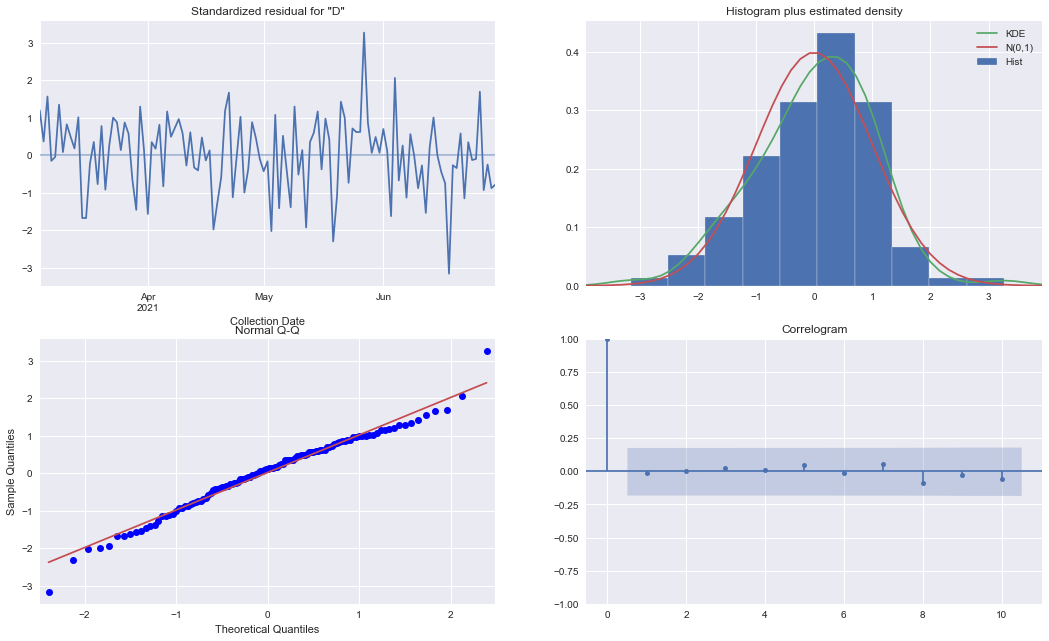

In [35]:
#AIC: {} Param: {} 787.9870647132233 ((0, 1, 1), (0, 1, 1, 7)) - 5 month
#AIC: {} Param: {} 731.9407352146463 ((0, 0, 2), (0, 2, 2, 7)) - 5 month

#6 Months Sample ARIMA(0, 1, 1)x(1, 2, 2, 7) - AIC:739.8299691115342 - 6 month

mod = sm.tsa.statespace.SARIMAX(dailycollection_train,
                                order=(0, 0, 2),
                                seasonal_order=(0, 2, 2, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())
results.plot_diagnostics(figsize=(16, 10))
plt.show()


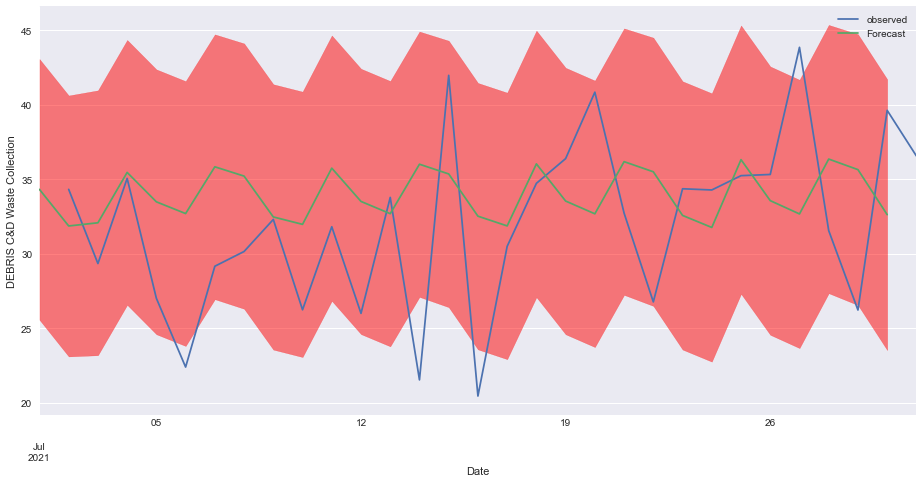

In [36]:
#Prediction Result Wrapper
pred_uc = results.get_forecast(steps=30)
#Confidence Interval
pred_ci = pred_uc.conf_int()

ax = dailycollection_test.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='red', alpha=.50)
ax.set_xlabel('Date')
ax.set_ylabel('DEBRIS C&D Waste Collection')

plt.legend()
plt.show()

In [37]:
y_forecasted = pred_uc.predicted_mean
y_truth = dailycollection_test
#
mse_debris = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse_debris, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse_debris), 2)))


The Mean Squared Error of our forecasts is 41.51
The Root Mean Squared Error of our forecasts is 6.44


# Time Series Cross Validation - Rolling Forecast Origin


In [22]:
 #Train Test Generator


def rolling_forecast(train, min_train_length, horizon):
    for i in range(0, len(train) - min_train_length, 5):
        split_train = train[: min_train_length + i]
        split_val = train[min_train_length + i: min_train_length + i + horizon]
        yield split_train, split_val


###
# Training Set [4 months from 1st feb'2021  to 31st May'2021]
# Validation Set [1 month from 1st Jun '2021  to 30th July'2021]
# Test Set [31 steps from 31st July'2021 to 31st Aug' 2021]
###
SPLIT_DATE = '2021-07-01'
train = daily_resampled.loc[daily_resampled.index < SPLIT_DATE]

# # for testing rolling function
# cv_rolling = rolling_forecast(train, 120, 5)
#
# i = 0
# for split_train, split_val in cv_rolling:
#     print(f'CV[{i+1}]')
#     print(f'Train length:\t{len(split_train)}')
#     print(f'Test Set:\t{split_val}')
#     i += 1




CV[1]
The Mean Squared Error of our forecasts is 34.25
The Root Mean Squared Error of our forecasts is 5.85
CV[2]
The Mean Squared Error of our forecasts is 16.6
The Root Mean Squared Error of our forecasts is 4.07
CV[3]
The Mean Squared Error of our forecasts is 23.0
The Root Mean Squared Error of our forecasts is 4.8
CV[4]
The Mean Squared Error of our forecasts is 48.88
The Root Mean Squared Error of our forecasts is 6.99
CV[5]
The Mean Squared Error of our forecasts is 13.13
The Root Mean Squared Error of our forecasts is 3.62
CV[6]
The Mean Squared Error of our forecasts is 9.69
The Root Mean Squared Error of our forecasts is 3.11
Average RMSE score for 6 folds:  4.74
Min RMSE score 6 folds:  3.11
Score Length  6
                                     SARIMAX Results                                     
Dep. Variable:                  DEBRIS C&D Waste   No. Observations:                  145
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 7)   Log Likelihood                -377.648
Da

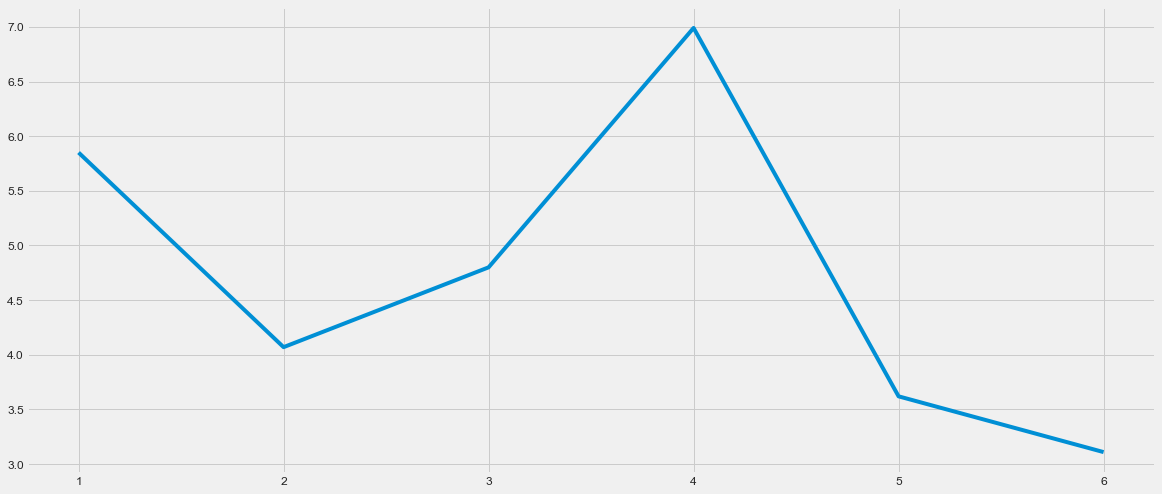

In [23]:
from numpy import mean

result_for_test = {}


def cross_validation_score(cv, order, seasonal_order):
    cv_scores = []
    i = 0
    for cv_train, cv_test in cv:
        model = sm.tsa.statespace.SARIMAX(cv_train,
                                          order=order,
                                          seasonal_order=seasonal_order,
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)
        result = model.fit()
        print(f'CV[{i + 1}]')
        # print(result.summary())
        y_forecasted = result.forecast(steps=len(cv_test))
        y_truth = cv_test
        mse = ((y_forecasted - y_truth) ** 2).mean()
        rmse = round(np.sqrt(mse), 2)
        print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
        print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))
        cv_scores.append(rmse)
        result_for_test.update({rmse: result})
        i += 1
    return np.array(cv_scores)


cv_rolling = rolling_forecast(train, 120, 5)
cv_scores_list = cross_validation_score(cv_rolling, order=(0, 1, 1), seasonal_order=(0, 1, 1, 7))
print("Average RMSE score for 6 folds: ", mean(cv_scores_list))
print("Min RMSE score 6 folds: ", min(cv_scores_list))
print("Score Length ", len(cv_scores_list))
sns.lineplot(x=[1, 2, 3, 4, 5, 6], y=cv_scores_list)
min_result = result_for_test[min(cv_scores_list)]
last_result = result_for_test[cv_scores_list[-1]]
print(min_result.summary())
print(last_result.summary())

y_forecasted = min_result.forecast(steps=31)
y_test_truth = daily_resampled.loc[daily_resampled.index >= SPLIT_DATE]
mse = ((y_forecasted - y_test_truth) ** 2).mean()
rmse = round(np.sqrt(mse), 2)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))



CV[1]
The Mean Squared Error of our forecasts is 36.77
The Root Mean Squared Error of our forecasts is 6.06
CV[2]
The Mean Squared Error of our forecasts is 9.95
The Root Mean Squared Error of our forecasts is 3.15
CV[3]
The Mean Squared Error of our forecasts is 13.93
The Root Mean Squared Error of our forecasts is 3.73
CV[4]
The Mean Squared Error of our forecasts is 51.51
The Root Mean Squared Error of our forecasts is 7.18
CV[5]
The Mean Squared Error of our forecasts is 7.57
The Root Mean Squared Error of our forecasts is 2.75
CV[6]
The Mean Squared Error of our forecasts is 22.11
The Root Mean Squared Error of our forecasts is 4.7
Average RMSE score for 6 folds:  4.595
Min RMSE score 6 folds:  2.75
                                     SARIMAX Results                                     
Dep. Variable:                  DEBRIS C&D Waste   No. Observations:                  140
Model:             SARIMAX(0, 0, 2)x(0, 2, 2, 7)   Log Likelihood                -333.214
Date:           

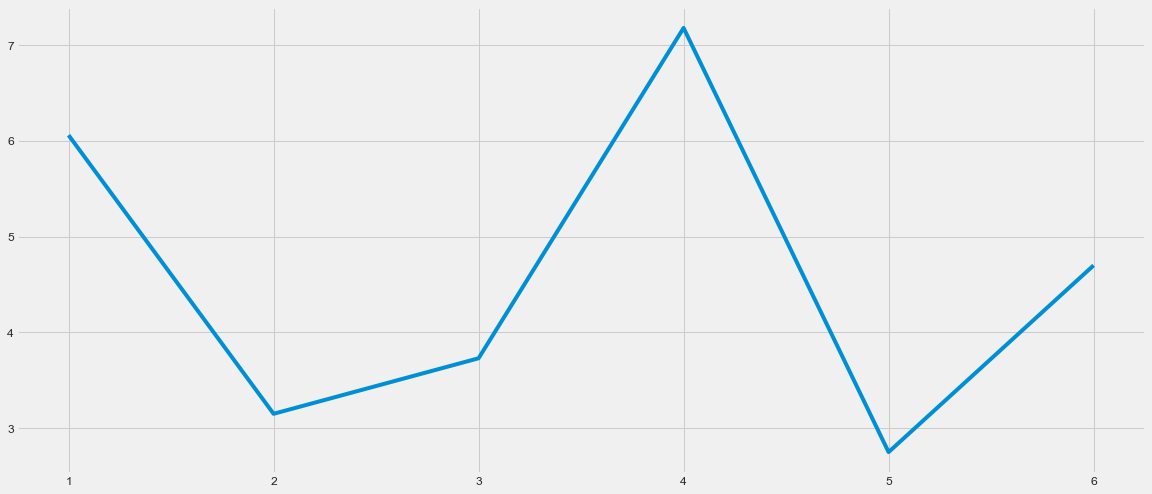

In [24]:
# Forecasting on unknown test set for specified parameters order = (0,1,2),seasonal_order =(0,2,2,7)

cv_rolling = rolling_forecast(train, 120, 5)
cv_scores_list = cross_validation_score(cv_rolling, order=(0, 0, 2), seasonal_order=(0, 2, 2, 7))
print("Average RMSE score for 6 folds: ", mean(cv_scores_list))
print("Min RMSE score 6 folds: ", min(cv_scores_list))
sns.lineplot(x=[1, 2, 3, 4, 5, 6], y=cv_scores_list)
min_result = result_for_test[min(cv_scores_list)]
last_result = result_for_test[cv_scores_list[-1]]
print(min_result.summary())
print(last_result.summary())

y_forecasted = min_result.forecast(steps=31)
y_test_truth = daily_resampled.loc[daily_resampled.index >= SPLIT_DATE]
mse = ((y_forecasted - y_test_truth) ** 2).mean()
rmse = round(np.sqrt(mse), 2)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))



CV[1]
The Mean Squared Error of our forecasts is 30.82
The Root Mean Squared Error of our forecasts is 5.55
CV[2]
The Mean Squared Error of our forecasts is 15.93
The Root Mean Squared Error of our forecasts is 3.99
CV[3]
The Mean Squared Error of our forecasts is 22.91
The Root Mean Squared Error of our forecasts is 4.79
CV[4]
The Mean Squared Error of our forecasts is 49.05
The Root Mean Squared Error of our forecasts is 7.0
CV[5]
The Mean Squared Error of our forecasts is 9.48
The Root Mean Squared Error of our forecasts is 3.08
CV[6]
The Mean Squared Error of our forecasts is 10.99
The Root Mean Squared Error of our forecasts is 3.31
Average RMSE score for 6 folds:  4.619999999999999
Minimum RMSE score:  3.08
                                     SARIMAX Results                                     
Dep. Variable:                  DEBRIS C&D Waste   No. Observations:                  140
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood                -363.977
Date:  

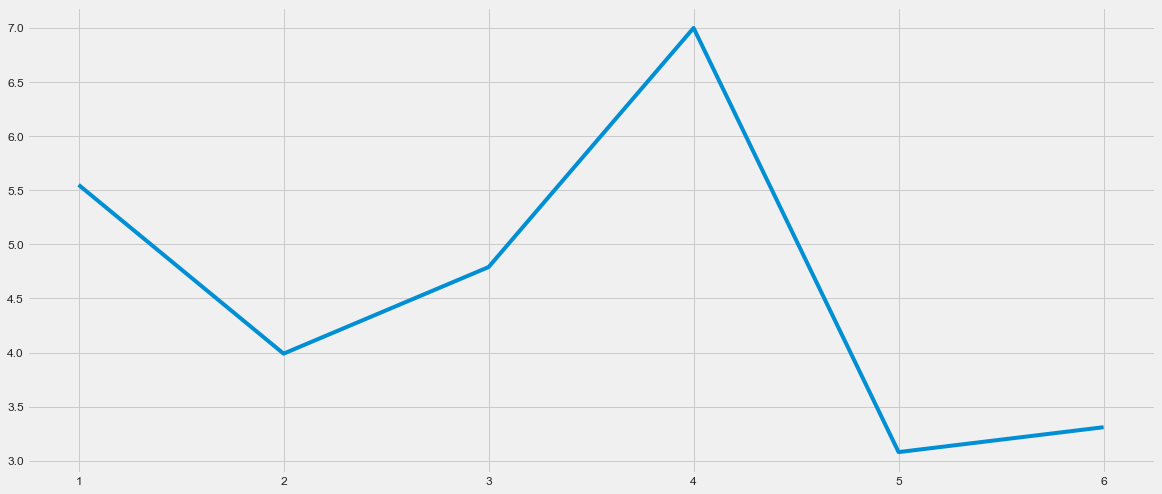

In [25]:
#Unspecified Parameters
cv_rolling = rolling_forecast(train, 120, 5)
cv_scores_list = cross_validation_score(cv_rolling, order=param, seasonal_order=param_seasonal)
print("Average RMSE score for 6 folds: ", mean(cv_scores_list))
print("Minimum RMSE score: ", min(cv_scores_list))
sns.lineplot(x=[1, 2, 3, 4, 5, 6], y=cv_scores_list)
min_result = result_for_test[min(cv_scores_list)]
last_result = result_for_test[cv_scores_list[-1]]
print(min_result.summary())
print(last_result.summary())

y_forecasted = min_result.forecast(steps=31)
y_test_truth = daily_resampled.loc[daily_resampled.index >= SPLIT_DATE]
mse = ((y_forecasted - y_test_truth) ** 2).mean()
rmse = round(np.sqrt(mse), 2)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))



# Simple Moving Average


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Collection Date   181 non-null    object 
 1   Door TO Door      181 non-null    float64
 2   GARDEN/Biomass    181 non-null    float64
 3   PRIVATE Vehicle   181 non-null    float64
 4   TOTAL             181 non-null    float64
 5   DEBRIS C&D Waste  181 non-null    float64
 6   Day               181 non-null    object 
 7   Day_Index         181 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 11.4+ KB


Text(0, 0.5, 'Weight [Tonnes]')

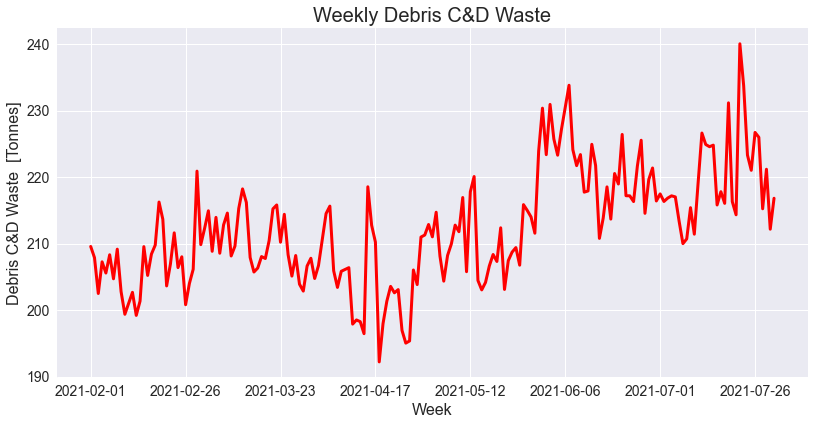

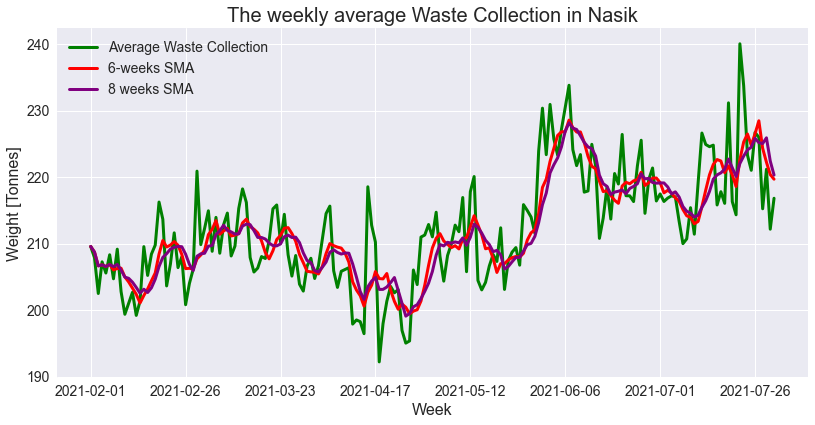

In [26]:
dailycollection.info()
dailycollection_ma = dailycollection[:]
# set year column as index
dailycollection_ma.set_index('Collection Date', inplace=True)

# dailycollection_ma.index.name = 'DEBRIS C&D Waste'

dailycollection_ma['average_debris'] = dailycollection_ma.mean(axis = 1)

# drop columns containing monthly values
# visualize the first 5 columns
dailycollection_ma.head()
plt.style.use('seaborn')

dailycollection_ma.head()
dailycollection_ma.drop(
    ['TOTAL', 'PRIVATE Vehicle', 'DEBRIS C&D Waste', 'Day', 'Day_Index', 'GARDEN/Biomass', 'Door TO Door'], axis=1,
    inplace=True)
dailycollection_ma.plot(color='red', linewidth=3, figsize=(12, 6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend('')

# title and labels
plt.title('Weekly Debris C&D Waste', fontsize=20)
plt.xlabel('Week', fontsize=16)
plt.ylabel('Debris C&D Waste  [Tonnes]', fontsize=16)
#Simple Moving Average
dailycollection_ma['SMA_6'] = dailycollection_ma.average_debris.rolling(6, min_periods=1).mean()

dailycollection_ma['SMA_8'] = dailycollection_ma.average_debris.rolling(8, min_periods=1).mean()
# colors for the line plot
colors = ['green', 'red', 'purple']

dailycollection_ma.plot(color=colors, linewidth=3, figsize=(12,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Average Waste Collection', '6-weeks SMA', '8 weeks SMA'], fontsize=14)

# title and labels
plt.title('The weekly average Waste Collection in Nasik', fontsize=20)
plt.xlabel('Week', fontsize=16)
plt.ylabel('Weight [Tonnes]', fontsize=16)